<a href="https://colab.research.google.com/github/Cospero/Kursovaya-/blob/main/Kursovaya_Kobrin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn import linear_model
import xgboost as xgb

from sklearn import metrics
from sklearn import ensemble




from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import time


import matplotlib.dates as mdates
from datetime import datetime, timedelta
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
from mpl_finance import candlestick_ohlc


from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Preparing metadata (setup.py) ... done


In [327]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [328]:
base_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crypto-markets.csv')

In [329]:
display(base_df)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [330]:
filtred_df=base_df[base_df.name=="Bitcoin"]
display(filtred_df)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43


In [331]:
filtred_df.isnull().any()

slug           False
symbol         False
name           False
date           False
ranknow        False
open           False
high           False
low            False
close          False
volume         False
market         False
close_ratio    False
spread         False
dtype: bool

In [332]:
filtred_df['date'] = pd.to_datetime(filtred_df['date'], format='%Y-%m-%d')

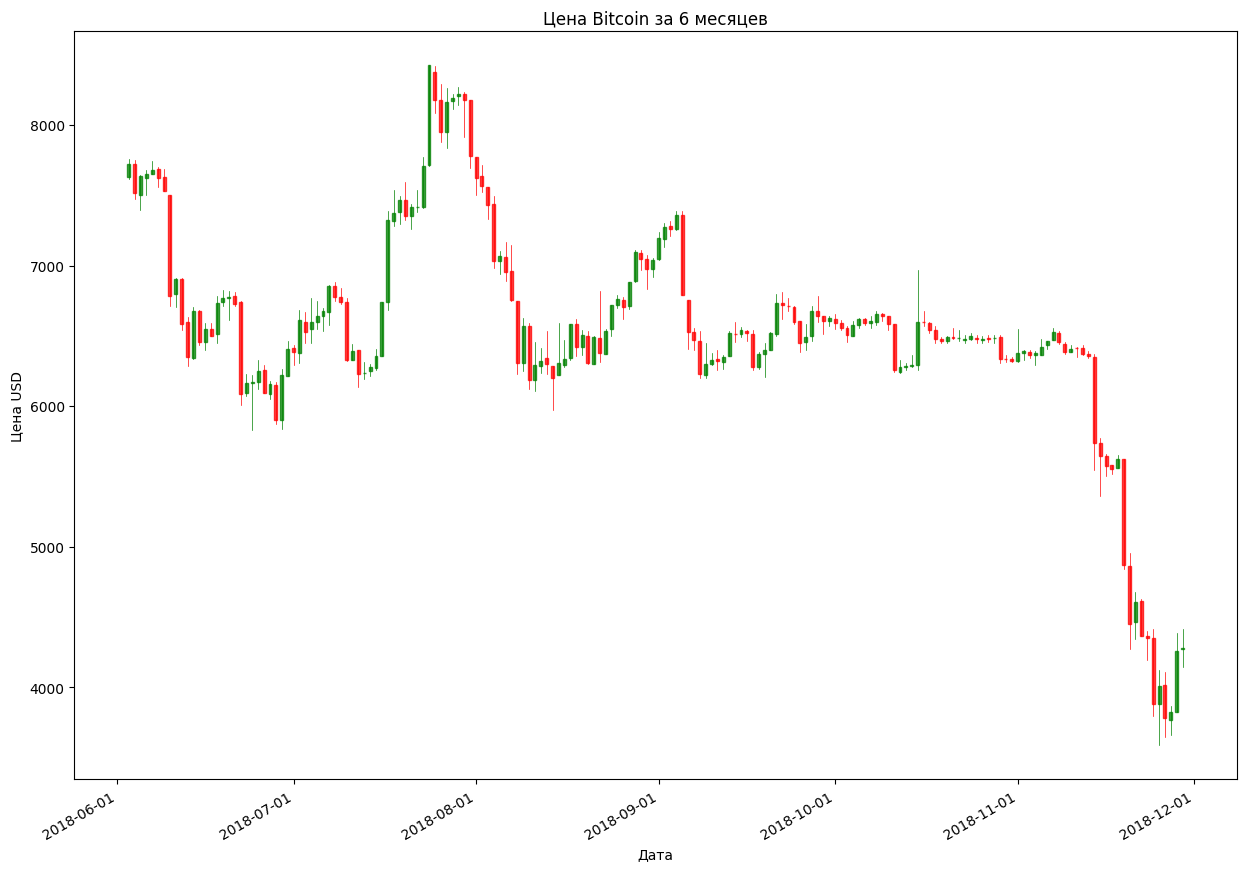

In [333]:
months=6

btc_price_df = filtred_df[(filtred_df['date'] > (max(filtred_df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = btc_price_df[['date','open','high','low','close']]
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

plt.xlabel("Дата")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title("Цена Bitcoin за 6 месяцев")
plt.ylabel("Цена USD")
plt.show()

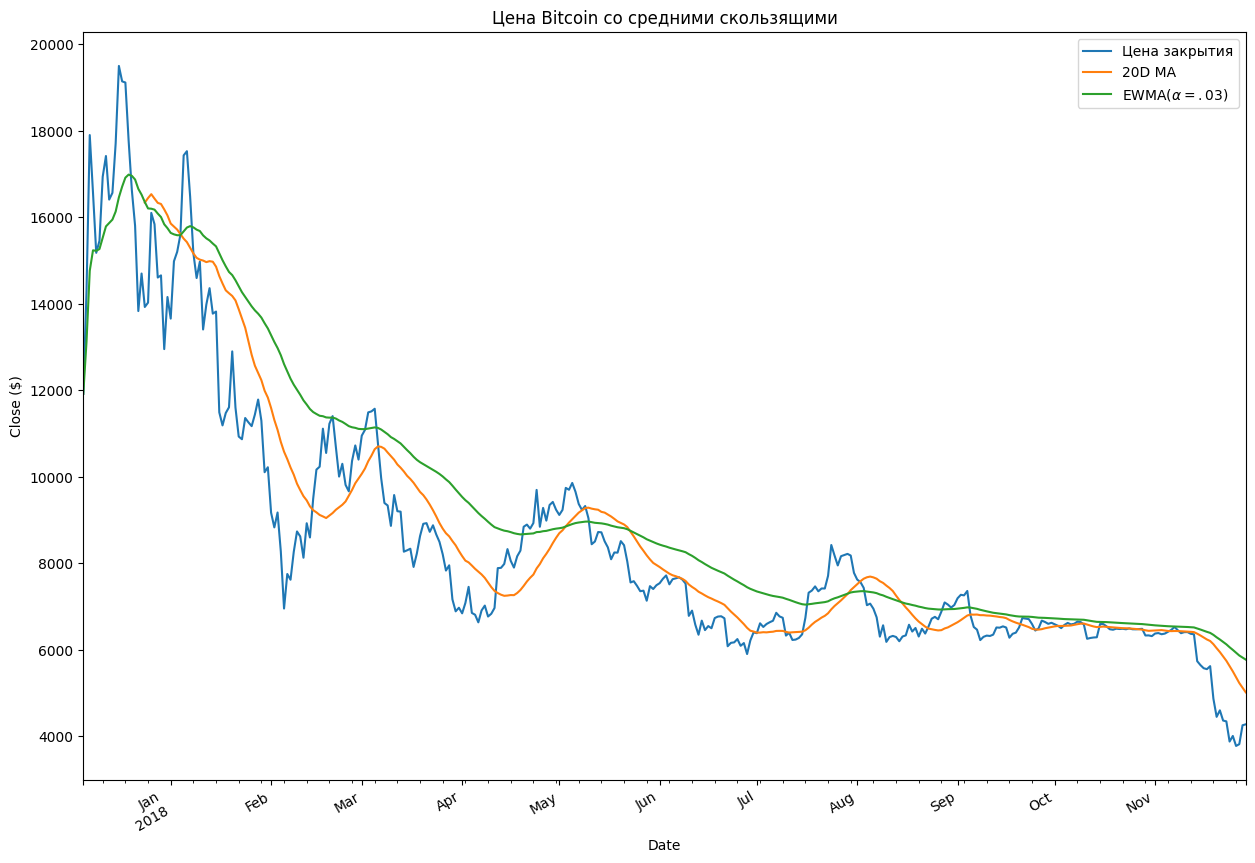

In [334]:
btc_priceMA_df = filtred_df[(filtred_df['date'] > (max(filtred_df['date']) - timedelta(days=30*12)))]

btc_priceMA_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
btc_priceMA_df.close.plot(label='Цена закрытия', ax=ax)
btc_priceMA_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
btc_priceMA_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title("Цена Bitcoin со средними скользящими")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

In [335]:
def Datapreperation():
    bitcoin_df = pd.DataFrame(filtred_df.loc[filtred_df.name =="Bitcoin", ["date", "open", "close", "high", "low"]]).set_index("date")
    bitcoin_df["close_nextday"] = bitcoin_df["close"].shift(periods = -1, fill_value = 0)
    temp = bitcoin_df[["open", "close", "high", "low"]]
    temp = temp[1800:]
    return bitcoin_df, temp

In [336]:
bitcoin_df, temp = Datapreperation()

In [337]:
bitcoin_df.head()

,open,close,high,low,close_nextday
date,,,,,
2013-04-28,135.30,134.21,135.98,132.10,144.54
2013-04-29,134.44,144.54,147.49,134.00,139.00
2013-04-30,144.00,139.00,146.93,134.05,116.99
2013-05-01,139.00,116.99,139.89,107.72,105.21
2013-05-02,116.38,105.21,125.60,92.28,97.75


In [338]:
def TestTrainpreperation(bitcoin_df):
    X = bitcoin_df[["open", "close", "high", "low"]]
    y = bitcoin_df[["close_nextday"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [339]:
X_train, X_test, y_train, y_test = TestTrainpreperation(bitcoin_df)

model1 = LinearRegression()
model2 = DecisionTreeRegressor(max_depth=3)
model3 = KNeighborsRegressor(n_neighbors=3)
model4 = xgb.XGBRegressor(max_depth=3, n_estimators=100)
model5 = linear_model.TweedieRegressor(max_iter=800)
model6 = Ridge()

start_time = time.time()
model1.fit(X_train, y_train)
end_time = time.time()
model1_time = (end_time-start_time)


start_time = time.time()
model2.fit(X_train, y_train)
end_time = time.time()
model2_time = (end_time-start_time)


start_time = time.time()
model3.fit(X_train, y_train)
end_time = time.time()
model3_time = (end_time-start_time)


start_time = time.time()
model4.fit(X_train, y_train)
end_time = time.time()
model4_time = (end_time-start_time)


start_time = time.time()
model5.fit(X_train, y_train)
end_time = time.time()
model5_time = (end_time-start_time)


start_time = time.time()
model6.fit(X_train, y_train)
end_time = time.time()
model6_time = (end_time-start_time)



In [340]:
print(X_train)
print(X_test)

               open    close     high      low
date                                          
2017-08-04  2806.93  2895.89  2899.33  2743.72
2015-08-31   229.11   230.06   231.96   225.91
2016-03-10   414.74   417.13   417.51   413.25
2013-09-23   128.98   125.95   132.73   125.66
2018-03-31  6892.48  6973.53  7207.85  6863.52
...             ...      ...      ...      ...
2016-06-01   531.11   536.92   543.08   525.64
2016-11-12   716.75   705.05   717.15   704.03
2015-09-05   230.20   235.02   236.14   229.44
2017-04-26  1265.99  1281.08  1294.83  1265.93
2016-05-28   473.03   530.04   533.47   472.70

[1429 rows x 4 columns]
                open     close      high      low
date                                             
2016-12-04    771.64    773.87    773.87   768.16
2016-01-23    382.43    387.49    394.54   381.98
2016-03-31    415.26    416.73    418.37   415.26
2018-09-18   6280.91   6371.30   6384.18  6265.71
2014-10-09    352.75    365.03    382.73   347.69
...           

In [341]:
def CalculateMetrics(model_pdediction, score_df, model_name, time):
    score_df.at["r2_score", model_name]=metrics.r2_score(y_test,model_pdediction)
    score_df.at["mean_squared_error", model_name]=metrics.mean_squared_error(y_test,model_pdediction)
    score_df.at["mean_absolute_error", model_name]=metrics.mean_absolute_error(y_test,model_pdediction)
    score_df.at["model_fit_time", model_name]=time*1000




In [342]:
score = pd.DataFrame(index = ["r2_score", "mean_squared_error", "mean_absolute_error","model_fit_time"], columns= ["LinearRegression", "DecisionTreeRegressor", "KNeighborsRegressor", "XGBRegressor","TweedieRegressor", "Ridle"])

y_pred_model1 = model1.predict(X_test)
y_pred_model2 = model2.predict(X_test)
y_pred_model3 = model3.predict(X_test)
y_pred_model4 = model4.predict(X_test)
y_pred_model5 = model5.predict(X_test)
y_pred_model6 = model6.predict(X_test)




CalculateMetrics(y_pred_model1, score, "LinearRegression", model1_time)
CalculateMetrics(y_pred_model2, score, "DecisionTreeRegressor", model2_time)
CalculateMetrics(y_pred_model3, score, "KNeighborsRegressor", model3_time)
CalculateMetrics(y_pred_model4, score, "XGBRegressor", model4_time)
CalculateMetrics(y_pred_model5, score, "TweedieRegressor", model5_time)
CalculateMetrics(y_pred_model6, score, "Ridle", model6_time)


print(score)


                    LinearRegression DecisionTreeRegressor  \
r2_score                    0.996683              0.980276   
mean_squared_error      39704.600937         236064.824515   
mean_absolute_error        75.514402            256.256902   
model_fit_time             18.007755             15.731335   

                    KNeighborsRegressor  XGBRegressor TweedieRegressor  \
r2_score                       0.994018      0.992917         0.996683   
mean_squared_error         71592.671141  84776.827086      39701.63652   
mean_absolute_error           93.057129    107.718371        75.512945   
model_fit_time                12.336731    291.864634        62.753201   

                            Ridle  
r2_score                 0.996683  
mean_squared_error   39704.598861  
mean_absolute_error     75.514401  
model_fit_time          11.755705  


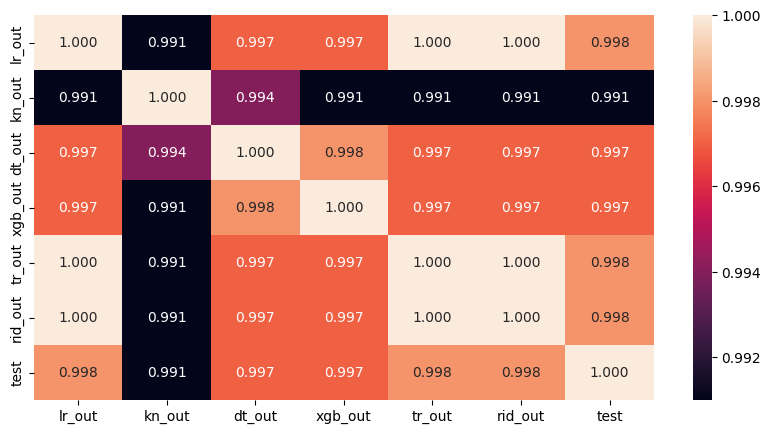

In [343]:
lr_out = y_pred_model1.squeeze()
kn_out = y_pred_model2.squeeze()
dt_out = y_pred_model3.squeeze()
xgb_out = y_pred_model4.squeeze()
tr_out=y_pred_model5.squeeze()
rid_out=y_pred_model6.squeeze()
y_test_out=y_test.squeeze()
stack_predict = np.vstack([lr_out,kn_out,dt_out,xgb_out,tr_out,rid_out,y_test_out]).T
corr_df = pd.DataFrame(stack_predict, columns=['lr_out','kn_out','dt_out','xgb_out','tr_out','rid_out','test'])
corr_matrix = corr_df.corr()
corr_matrix = corr_matrix.round(3)
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True,  fmt=".3f")
plt.show()

In [344]:
X_train_meta = np.column_stack((
    cross_val_predict(model1, X_train, y_train, cv=3),
    cross_val_predict(model2, X_train, y_train, cv=3),
    cross_val_predict(model3, X_train, y_train, cv=3),
    cross_val_predict(model4, X_train, y_train, cv=3),

))

X_test_meta = np.column_stack((
    model1.predict(X_test),
    model2.predict(X_test),
    model3.predict(X_test),
    model4.predict(X_test),

))

meta_model = linear_model.MultiTaskLasso()
start_time = time.time()
meta_model.fit(X_train_meta, y_train)
end_time = time.time()
meta_model_time = (end_time-start_time)




y_pred = meta_model.predict(X_test_meta)

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)
print('fit_time:', meta_model_time*1000)

results = pd.DataFrame(meta_model.predict(temp))
results = results.rename(columns={0: "Prediction"})
results = results.set_index(temp.index)
bitcoin_df = bitcoin_df.join(results, how = "left")


MSE: 37192.872438065315
MAE: 78.06037840849838
R2: 0.9968923885658552
fit_time: 17.154455184936523


               open    close     high      low  close_nextday   Prediction
date                                                                      
2018-05-22  8419.87  8041.78  8423.25  8004.58        7557.82  8373.707615
2018-05-23  8037.08  7557.82  8054.66  7507.88        7587.34  7976.746928
2018-05-24  7561.12  7587.34  7738.60  7331.14        7480.14  7558.448060
2018-05-25  7592.30  7480.14  7659.14  7392.65        7355.88  7578.511153
2018-05-26  7486.48  7355.88  7595.16  7349.12        7368.22  7473.542772
...             ...      ...      ...      ...            ...          ...
2018-11-25  3880.78  4009.97  4120.87  3585.06        3779.13  3881.966966
2018-11-26  4015.07  3779.13  4107.14  3643.92        3820.72  3980.370335
2018-11-27  3765.95  3820.72  3862.96  3661.01        4257.42  3768.420134
2018-11-28  3822.47  4257.42  4385.90  3822.47        4278.85  3863.389395
2018-11-29  4269.00  4278.85  4413.02  4145.77           0.00  4266.991236

[192 rows x 6 columns]


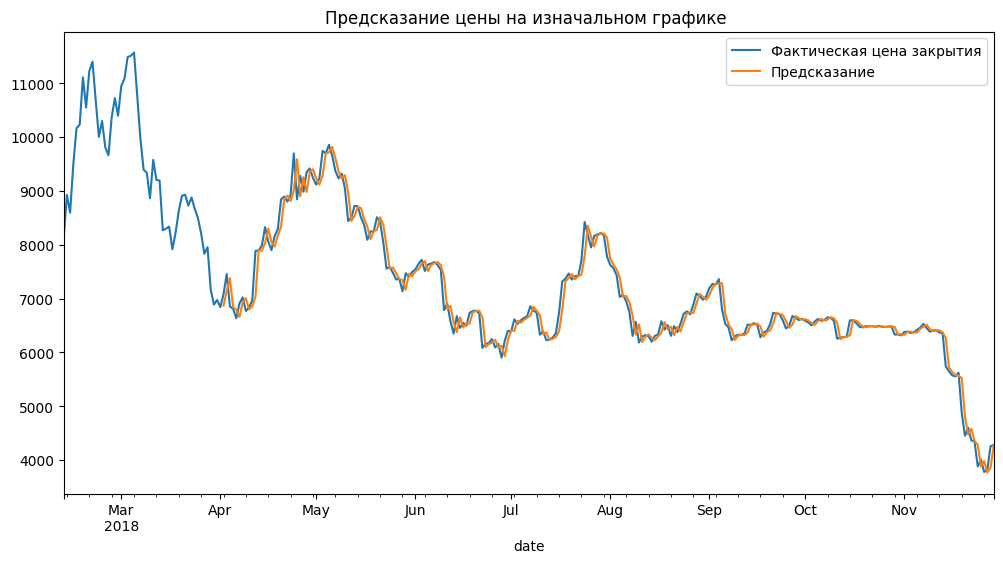

In [345]:
bitcoin_df=bitcoin_df[1750:]
bitcoin_df['close'].plot(figsize=(12,6),label='Фактическая цена закрытия',title = "Предсказание цены на изначальном графике ")
bitcoin_df['Prediction'].plot(label='Предсказание')
plt.legend()
print(bitcoin_df[100:])

MSE: 37192.872438065315  MSE_New: 37321.46212728588
MAE: 78.06037840849838  MAE_New: 78.35611241275598
R2: 0.9968923885658552  R2_New: 0.9968816443892874
               open    close     high      low  close_nextday   Prediction  \
date                                                                         
2018-05-22  8419.87  8041.78  8423.25  8004.58        7557.82  8373.707615   
2018-05-23  8037.08  7557.82  8054.66  7507.88        7587.34  7976.746928   
2018-05-24  7561.12  7587.34  7738.60  7331.14        7480.14  7558.448060   
2018-05-25  7592.30  7480.14  7659.14  7392.65        7355.88  7578.511153   
2018-05-26  7486.48  7355.88  7595.16  7349.12        7368.22  7473.542772   
...             ...      ...      ...      ...            ...          ...   
2018-11-25  3880.78  4009.97  4120.87  3585.06        3779.13  3881.966966   
2018-11-26  4015.07  3779.13  4107.14  3643.92        3820.72  3980.370335   
2018-11-27  3765.95  3820.72  3862.96  3661.01        4257.42  376

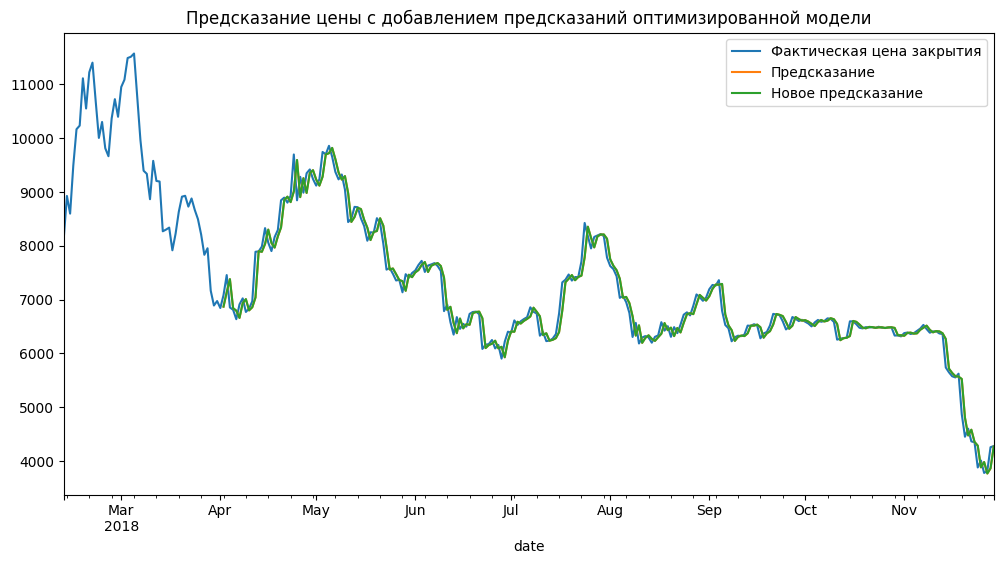

In [346]:
grid_params={
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000]
}

meta_model2=linear_model.MultiTaskLasso()
grid_search = GridSearchCV(estimator=meta_model2, param_grid=grid_params, cv=5)

grid_search.fit(X_train_meta, y_train)

best_params=grid_search.best_params_

model3=linear_model.MultiTaskLasso(**best_params)
model3.fit(X_train_meta, y_train)

y_pred = model3.predict(X_test_meta)

mse_new = metrics.mean_squared_error(y_test, y_pred)
mae_new = metrics.mean_absolute_error(y_test, y_pred)
r2_new = metrics.r2_score(y_test, y_pred)

print('MSE:', mse,' MSE_New:', mse_new)
print('MAE:', mae,' MAE_New:', mae_new)
print('R2:', r2,' R2_New:', r2_new)

results = pd.DataFrame(model3.predict(temp))
results = results.rename(columns={0: "New Prediction"})
results = results.set_index(temp.index)
bitcoin_df = bitcoin_df.join(results, how = "left")

bitcoin_df['close'].plot(figsize=(12,6),label='Фактическая цена закрытия',title = "Предсказание цены с добавлением предсказаний оптимизированной модели")
bitcoin_df['Prediction'].plot(label='Предсказание')
bitcoin_df['New Prediction'].plot(label='Новое предсказание')
plt.legend()

print(bitcoin_df[100:])